In [1]:

import random
import numpy as np

from robot import Robot

import matplotlib.pyplot as plt
import seaborn as sns
import jupyterthemes
import warnings

In [2]:
%matplotlib inline
jupyterthemes.jtplot.style()
warnings.filterwarnings("ignore")
sns.set_context("poster")

In [11]:
# -----------
# User Instructions
#
# Implement a PD controller by running 100 iterations
# of robot motion. The steering angle should be set
# by the parameter tau_p and tau_d so that:
#
# steering = -tau_p * CTE - tau_d * diff_CTE
# where differential crosstrack error (diff_CTE)
# is given by CTE(t) - CTE(t-1)
#
#
# Only modify code at the bottom! Look for the TODO
# ------------

In [6]:
# previous P controller
def run_p(robot, tau, n=100, speed=1.0):
    x_trajectory = []
    y_trajectory = []
    for i in range(n):
        cte = robot.y
        steer = -tau * cte
        robot.move(steer, speed)
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
    return x_trajectory, y_trajectory

In [7]:
def run_pd(robot, tau_p, tau_d, n=100, speed=1.0):
    x_trajectory = np.arange(n)
    
    def move_and_get_y(cte_previous, time_step, acc):
        if time_step == n: return acc
        
        cte_current = robot.y
        delta_time = 1 #note, assumed linear delta time of 1
        cte_delta = (cte_current - cte_previous)/delta_time
        steer = -tau_p * cte_current - tau_d * cte_delta
        robot.move(steer, speed)
        
        return move_and_get_y(cte_current, time_step + 1,  acc + [robot.y])
    
    # TODO: your code here
    return x_trajectory, move_and_get_y(robot.y, 0, [])

In [19]:
def run_pid(robot, tau_p, tau_d, tau_i, n=100, speed=1.0):
    x_trajectory = np.arange(n)
    
    def move_and_get_y(cte_previous, cte_total, time_step, acc):
        if time_step == n: return acc
        
        cte_current = robot.y
        delta_time = 1 #note, assumed linear delta time of 1
        cte_delta = (cte_current - cte_previous)/delta_time
        steer = -tau_p * cte_current - tau_d * cte_delta - tau_i * cte_total
        robot.move(steer, speed)
        
        return move_and_get_y(cte_current, 
                              cte_total + cte_current, 
                              time_step + 1,  
                              acc + [robot.y])
    
    # TODO: your code here
    return x_trajectory, move_and_get_y(robot.y, robot.y, 0, [])

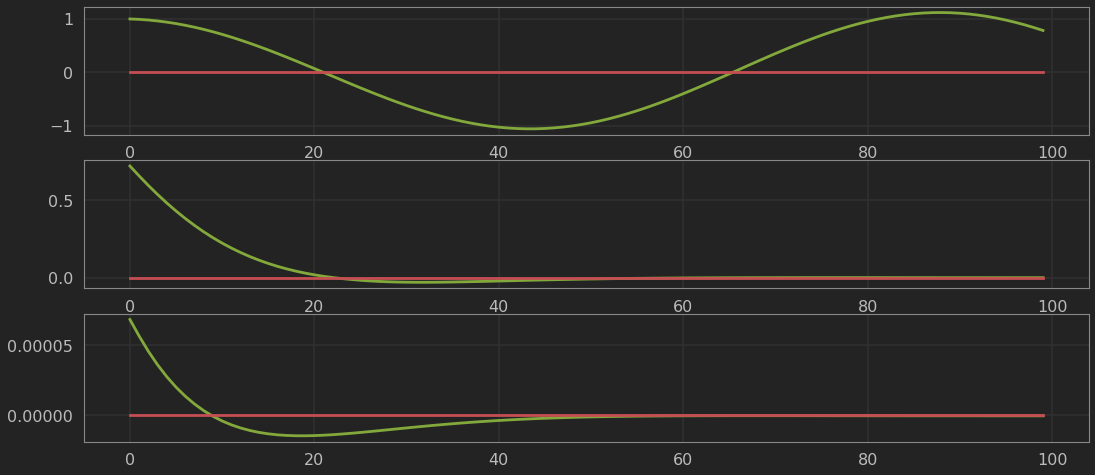

In [23]:


    
robot = Robot()
robot.set(0, 1, 0)


    
x_trajectory, y_trajectory_p = run_p(robot, 0.1)
x_trajectory, y_trajectory_pd = run_pd(robot, 0.2, 3.0)
x_trajectory, y_trajectory_pid = run_pid(robot, 0.2, 3.0, .001)
n = len(x_trajectory)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 8))
ax1.plot(x_trajectory, y_trajectory_p, 'g', label='P controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')

ax2.plot(x_trajectory, y_trajectory_pd, 'g', label='PD controller')
ax2.plot(x_trajectory, np.zeros(n), 'r', label='reference')

ax3.plot(x_trajectory, y_trajectory_pid, 'g', label='PID controller')
ax3.plot(x_trajectory, np.zeros(n), 'r', label='reference')

In [32]:
[] + [1] + [2]

[1, 2]